<a href="https://colab.research.google.com/github/johntango/Cert3/blob/main/KMeansDigitRecognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# KMeans and Clustering Blobs of Data

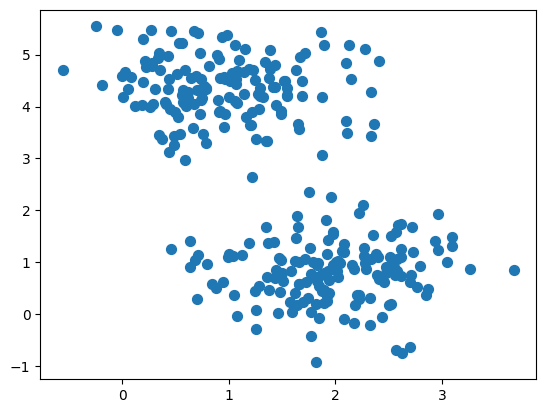

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import sklearn
#import sklearn.datasets- make_blobs
from sklearn.datasets import make_blobs
# Generate some data
X, y_true = make_blobs(n_samples=300, centers=2,
                       cluster_std=0.60, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=50);

/home/vscode/.local/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


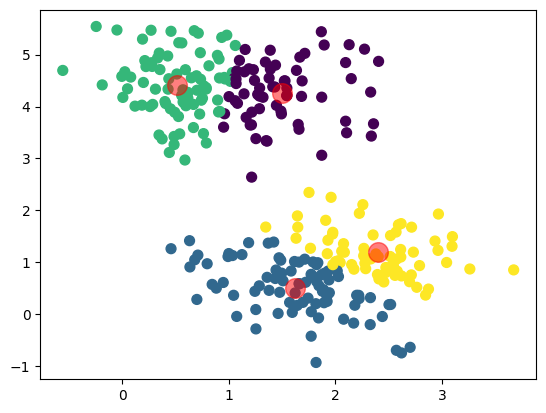

In [2]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5);

[ 84 217]


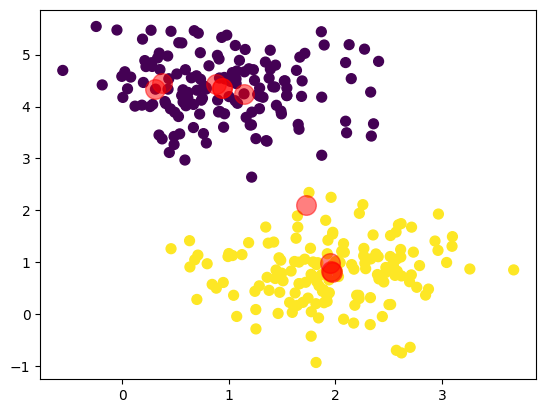

In [3]:
from sklearn.metrics import pairwise_distances_argmin

def find_clusters(X, n_clusters, rseed=3):
    # 1. Randomly choose clusters
    rng = np.random.RandomState(rseed)
    i = rng.permutation(X.shape[0])[:n_clusters] # look up what this does
    print(i)
    centers = X[i]
    center_hist = centers
    while True:
        # 2a. Assign labels based on closest center
        labels = pairwise_distances_argmin(X, centers)
        
        # 2b. Find new centers from means of points
        new_centers = np.array([X[labels == i].mean(0)
                                for i in range(n_clusters)])
        
        # 2c. Check for convergence
        if np.all(centers == new_centers):
            break
        centers = new_centers
        center_hist = np.vstack((center_hist, centers)) # track movement of centers
    
    return centers, labels, center_hist

centers, labels,center_hist = find_clusters(X, 2)
plt.scatter(X[:, 0], X[:, 1], c=labels,
            s=50, cmap='viridis');
plt.scatter(center_hist[:, 0], center_hist[:, 1], c='red', s=200, alpha=0.5);

Suppose our points had some color already assigned to them. How would we change our algoirthm. Its certainly not obvious how to trade off spatial distance in (x,y) space and "color". There would be many choices we could make. Finding the appropriate "metrics" is sometimes like comparing "apples" and "oranges". 

# Recognize Digits Exercise
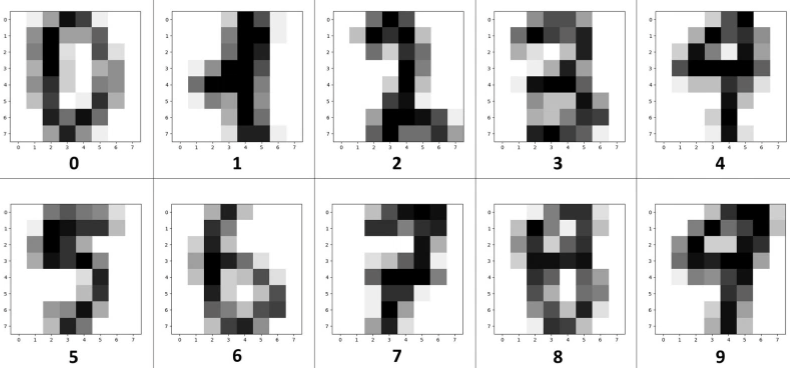

Each image has 64 pixels and each pixel has a greyscale color "depth" from 0 through 15. Our goal is to understand which images are "close" to each other so we can cluster them. Notice that the measure of difference D between two images A and B, D(A,B) is not unique. However, for now we will assume that Sklearn's Kmeans algorithm makes a good choice.

In [4]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

(1797, 64)

Note that we have 1797 images each with 8x8 pixels 
Our goal is to "cluster" together similar images
In 2D we use "Euclidean distance" to cluster points
In 64D we measure "Euclidean distance" in 64 space

In [5]:
kmeans = KMeans(n_clusters=10, random_state=0)
clusters = kmeans.fit_predict(digits.data)
kmeans.cluster_centers_.shape # check the center's shape

/home/vscode/.local/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


(10, 64)

So our result is 10 centers in 64 space. Each center is a 64D point. Thus we can plot the centers, since they like at the center of a cluster that should represent one of the ten digits. 

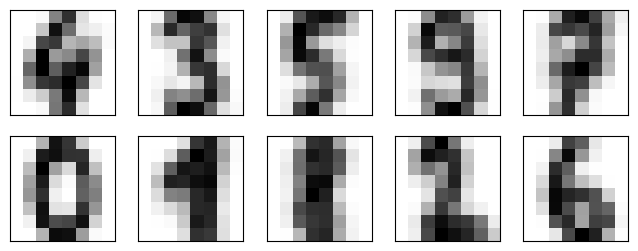

In [6]:
fig, ax = plt.subplots(2, 5, figsize=(8, 3))
centers = kmeans.cluster_centers_.reshape(10, 8, 8)
for axi, center in zip(ax.flat, centers):
    axi.set(xticks=[], yticks=[])
    axi.imshow(center, interpolation='nearest', cmap=plt.cm.binary)

These cluster know nothing about digits. They are just "similar" images. 


In [7]:
from scipy.stats import mode

labels = np.zeros_like(clusters)
for i in range(10):
    mask = (clusters == i)
    labels[mask] = mode(digits.target[mask])[0]
    

/tmp/ipykernel_12963/2280326800.py:6: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  labels[mask] = mode(digits.target[mask])[0]


In [8]:
from sklearn.metrics import accuracy_score
accuracy_score(digits.target, labels)

0.7935447968836951

We can check the "confusion" matrix to see what digits are being confused with each other

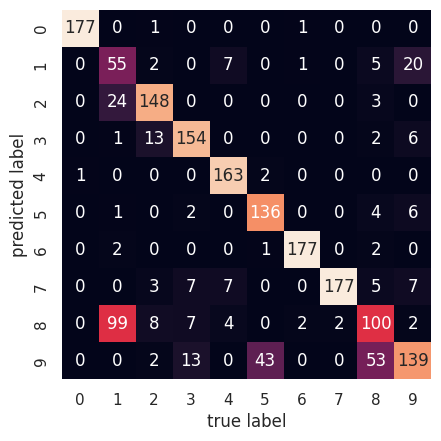

In [9]:
from sklearn.metrics import confusion_matrix
import seaborn as sns; sns.set()
mat = confusion_matrix(digits.target, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=digits.target_names,
            yticklabels=digits.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');

We see that 8 and 1 are confused with each other as well as 9 and 0.
